In [107]:
import pandas as pd
import numpy as np

In [108]:
df = pd.read_csv("data.csv")

In [109]:
df.head()

Reviewer Name               Review Title  \
0            Kamal Suresh               Nice product   
1       Flipkart Customer     Don't waste your money   
2  A. S. Raja Srinivasan   Did not meet expectations   
3     Suresh Narayanasamy                       Fair   
4               ASHIK P A                Over priced   

               Place of Review  Up Votes  Down Votes     Month  \
0   Certified Buyer, Chirakkal     889.0        64.0  Feb 2021   
1   Certified Buyer, Hyderabad     109.0         6.0  Feb 2021   
2  Certified Buyer, Dharmapuri      42.0         3.0  Apr 2021   
3     Certified Buyer, Chennai      25.0         1.0       NaN   
4                          NaN     147.0        24.0  Apr 2016   

                                         Review text  Ratings  
0  Nice product, good quality, but price is now r...        4  
1  They didn't supplied Yonex Mavis 350. Outside ...        1  
2  Worst product. Damaged shuttlecocks packed in ...        1  
3  Quite O. K. , but nowadays  the quality of the...        3  
4  Over pricedJust â?¹620 ..from retailer.I didn'...        1

In [110]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [111]:
df[df["Review text"].isnull()]

Reviewer Name Review Title Place of Review  Up Votes  Down Votes Month  \
8510           NaN          NaN             NaN       NaN         NaN   NaN   
8511           NaN          NaN             NaN       NaN         NaN   NaN   
8512           NaN          NaN             NaN       NaN         NaN   NaN   
8513           NaN          NaN             NaN       NaN         NaN   NaN   
8514           NaN          NaN             NaN       NaN         NaN   NaN   
8515           NaN          NaN             NaN       NaN         NaN   NaN   
8516           NaN          NaN             NaN       NaN         NaN   NaN   
8517           NaN          NaN             NaN       NaN         NaN   NaN   

     Review text  Ratings  
8510         NaN        1  
8511         NaN        1  
8512         NaN        2  
8513         NaN        5  
8514         NaN        2  
8515         NaN        4  
8516         NaN        1  
8517         NaN        4

In [112]:
df[df["Reviewer Name"].isnull()]

Reviewer Name Review Title Place of Review  Up Votes  Down Votes Month  \
8508           NaN          NaN             NaN       NaN         NaN   NaN   
8509           NaN          NaN             NaN       NaN         NaN   NaN   
8510           NaN          NaN             NaN       NaN         NaN   NaN   
8511           NaN          NaN             NaN       NaN         NaN   NaN   
8512           NaN          NaN             NaN       NaN         NaN   NaN   
8513           NaN          NaN             NaN       NaN         NaN   NaN   
8514           NaN          NaN             NaN       NaN         NaN   NaN   
8515           NaN          NaN             NaN       NaN         NaN   NaN   
8516           NaN          NaN             NaN       NaN         NaN   NaN   
8517           NaN          NaN             NaN       NaN         NaN   NaN   

                                            Review text  Ratings  
8508  No complaints about the item . Its the best on...        5  
8509  Not sure why we have charged for this product ...        1  
8510                                                NaN        1  
8511                                                NaN        1  
8512                                                NaN        2  
8513                                                NaN        5  
8514                                                NaN        2  
8515                                                NaN        4  
8516                                                NaN        1  
8517                                                NaN        4

In [113]:
df=df.dropna(subset=["Reviewer Name"])

In [114]:
df.isnull().sum()

Reviewer Name        0
Review Title         0
Place of Review     40
Up Votes             0
Down Votes           0
Month              455
Review text          0
Ratings              0
dtype: int64

In [115]:
# Forward fill NaN values
df = df.fillna(method='ffill')

In [116]:
df.isna().sum()

Reviewer Name      0
Review Title       0
Place of Review    0
Up Votes           0
Down Votes         0
Month              0
Review text        0
Ratings            0
dtype: int64

In [117]:
!pip install wordcloud

In [118]:
# Visuallizing an overall Word Cloud from the given data

from wordcloud import WordCloud

wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(df['Review text']))

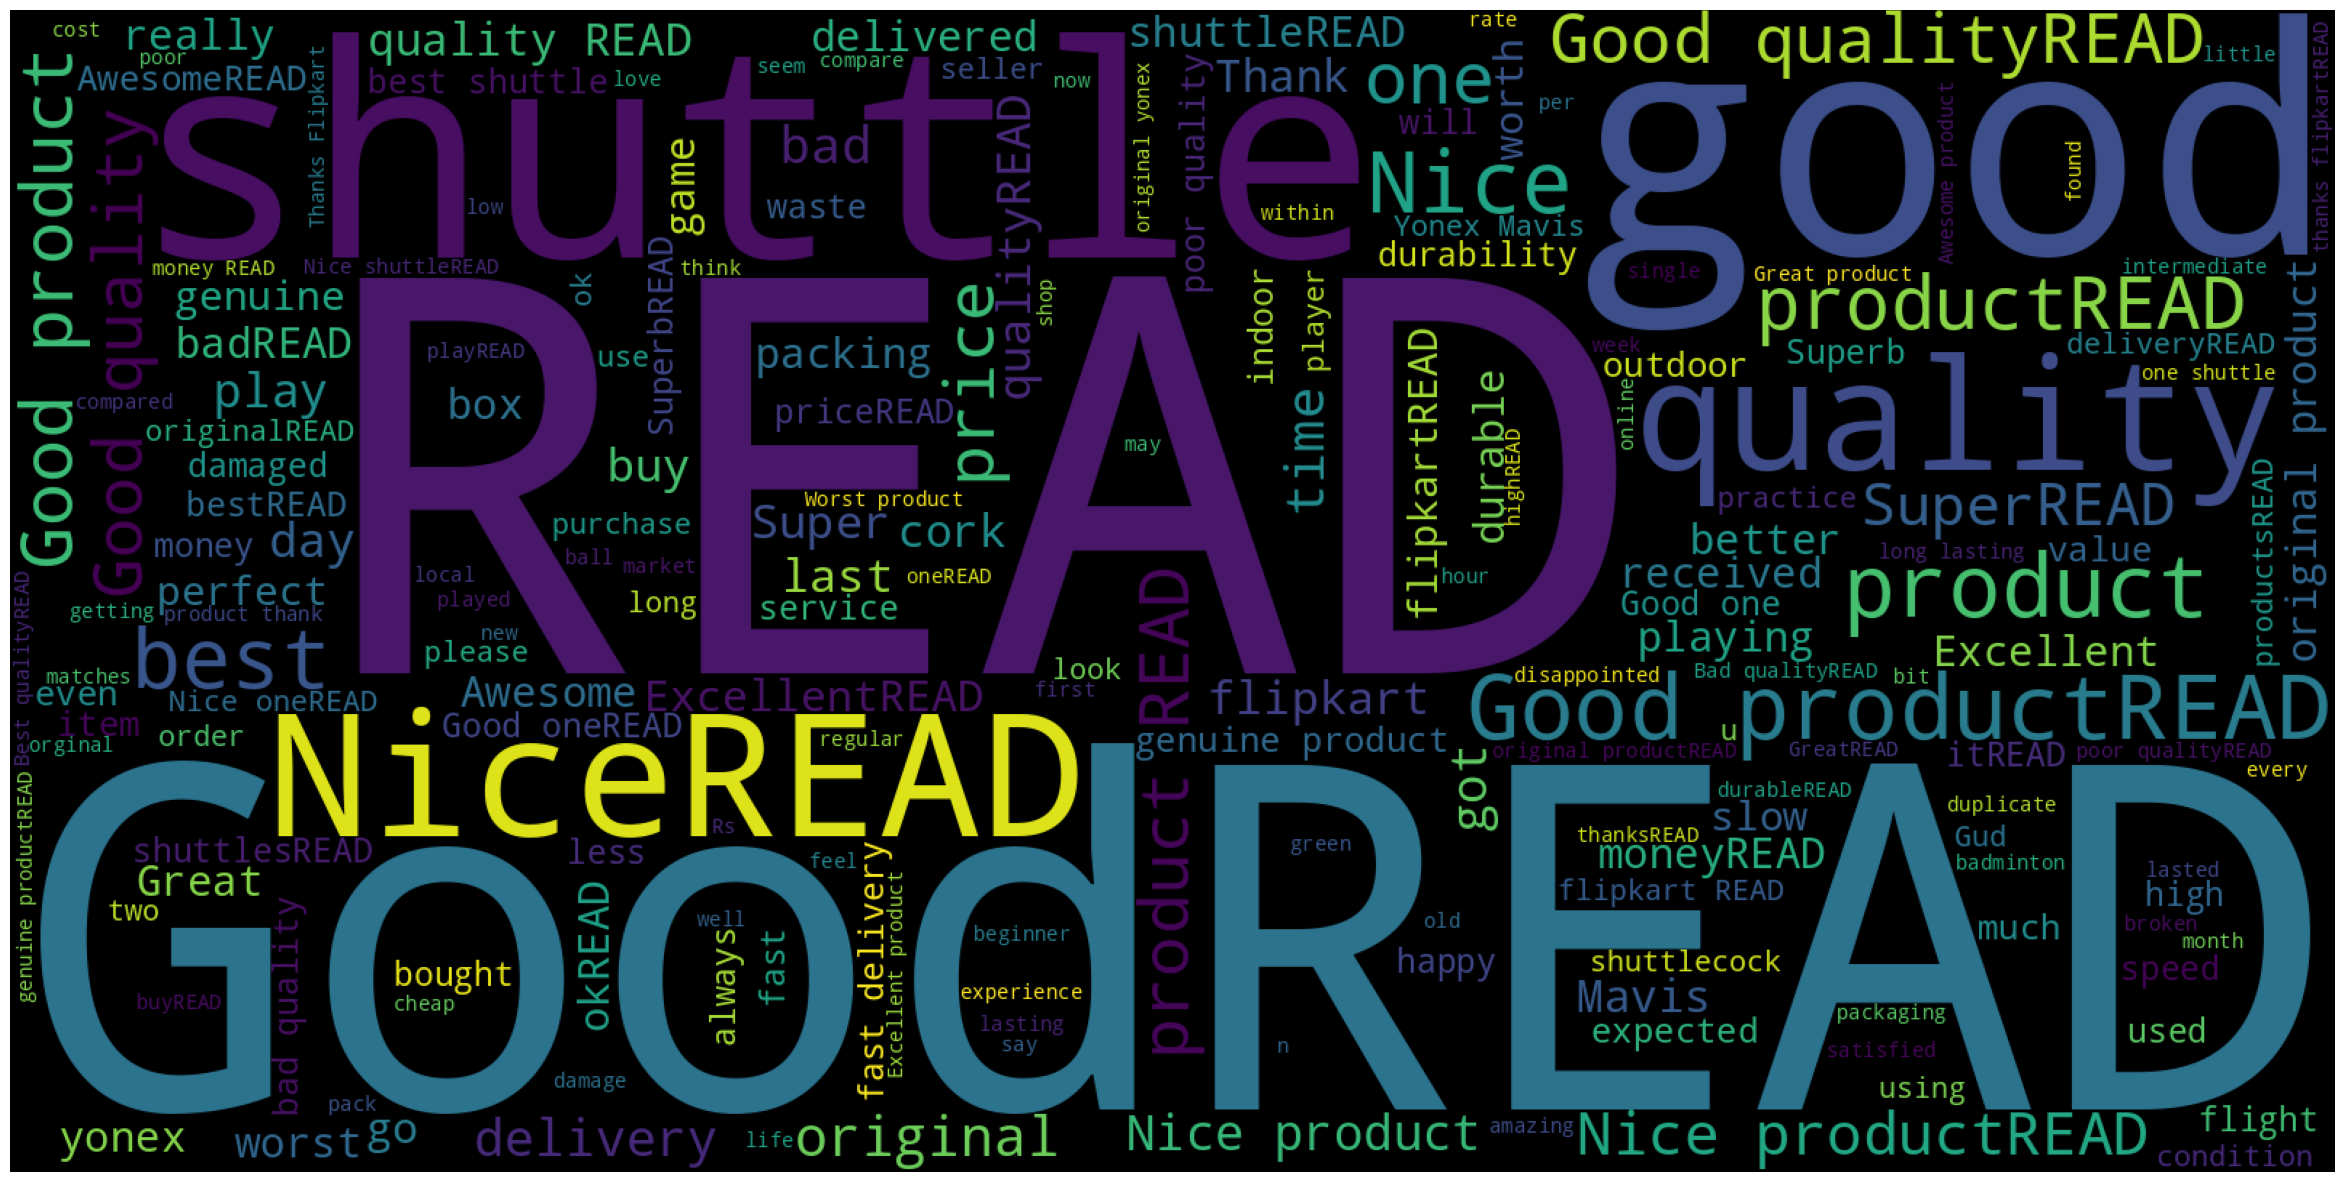

In [119]:
import matplotlib.pyplot as plt

plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [120]:
def calculate_sentiment(row):
    # Check if both Up Votes and Down Votes are zero
    if row['Up Votes'] == 0 and row['Down Votes'] == 0:
        # Dynamically calculate threshold based on the ratings
        min_rating = min(df['Ratings'])
        max_rating = max(df['Ratings'])
        threshold = (max_rating - min_rating) / 2 + min_rating
        # Make decision based on the rating
        if row['Ratings'] >= threshold:
            return 1  # Positive sentiment
        else:
            return 0  # Negative sentiment
    else:
        # Calculate sentiment based on Up Votes, Down Votes, and Ratings
        ratio = row['Up Votes'] / (row['Up Votes'] + row['Down Votes'])
        weighted_rating = row['Ratings'] * ratio
        threshold = 0.5  # Set a fixed threshold when votes are present
        if weighted_rating >= threshold:
            return 1  # Positive sentiment
        else:
            return 0  # Negative sentiment

# Apply the calculate_sentiment function to each row of the DataFrame
df['Sentiment'] = df.apply(calculate_sentiment, axis=1)

In [121]:
df.head()

Reviewer Name               Review Title  \
0            Kamal Suresh               Nice product   
1       Flipkart Customer     Don't waste your money   
2  A. S. Raja Srinivasan   Did not meet expectations   
3     Suresh Narayanasamy                       Fair   
4               ASHIK P A                Over priced   

               Place of Review  Up Votes  Down Votes     Month  \
0   Certified Buyer, Chirakkal     889.0        64.0  Feb 2021   
1   Certified Buyer, Hyderabad     109.0         6.0  Feb 2021   
2  Certified Buyer, Dharmapuri      42.0         3.0  Apr 2021   
3     Certified Buyer, Chennai      25.0         1.0  Apr 2021   
4     Certified Buyer, Chennai     147.0        24.0  Apr 2016   

                                         Review text  Ratings  Sentiment  
0  Nice product, good quality, but price is now r...        4          1  
1  They didn't supplied Yonex Mavis 350. Outside ...        1          1  
2  Worst product. Damaged shuttlecocks packed in ...        1          1  
3  Quite O. K. , but nowadays  the quality of the...        3          1  
4  Over pricedJust â?¹620 ..from retailer.I didn'...        1          1

In [122]:
X = df.loc[:,'Review text']

In [123]:
X.head()

0    Nice product, good quality, but price is now r...
1    They didn't supplied Yonex Mavis 350. Outside ...
2    Worst product. Damaged shuttlecocks packed in ...
3    Quite O. K. , but nowadays  the quality of the...
4    Over pricedJust â?¹620 ..from retailer.I didn'...
Name: Review text, dtype: object

In [124]:
y = df.loc[:,'Sentiment']

In [125]:
y.value_counts()

1    7467
0    1041
Name: Sentiment, dtype: int64

<Axes: ylabel='Sentiment'>

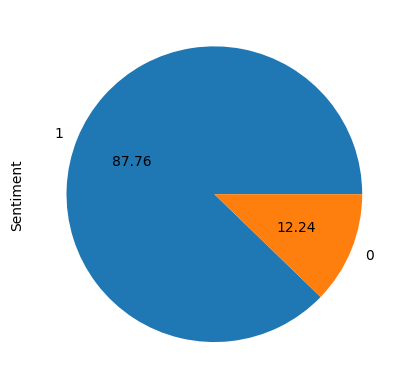

In [126]:
y.value_counts().plot.pie(autopct="%.2f")

In [127]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_wordcloud(data):
    wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data))
    plt.figure(1,figsize=(30,20))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

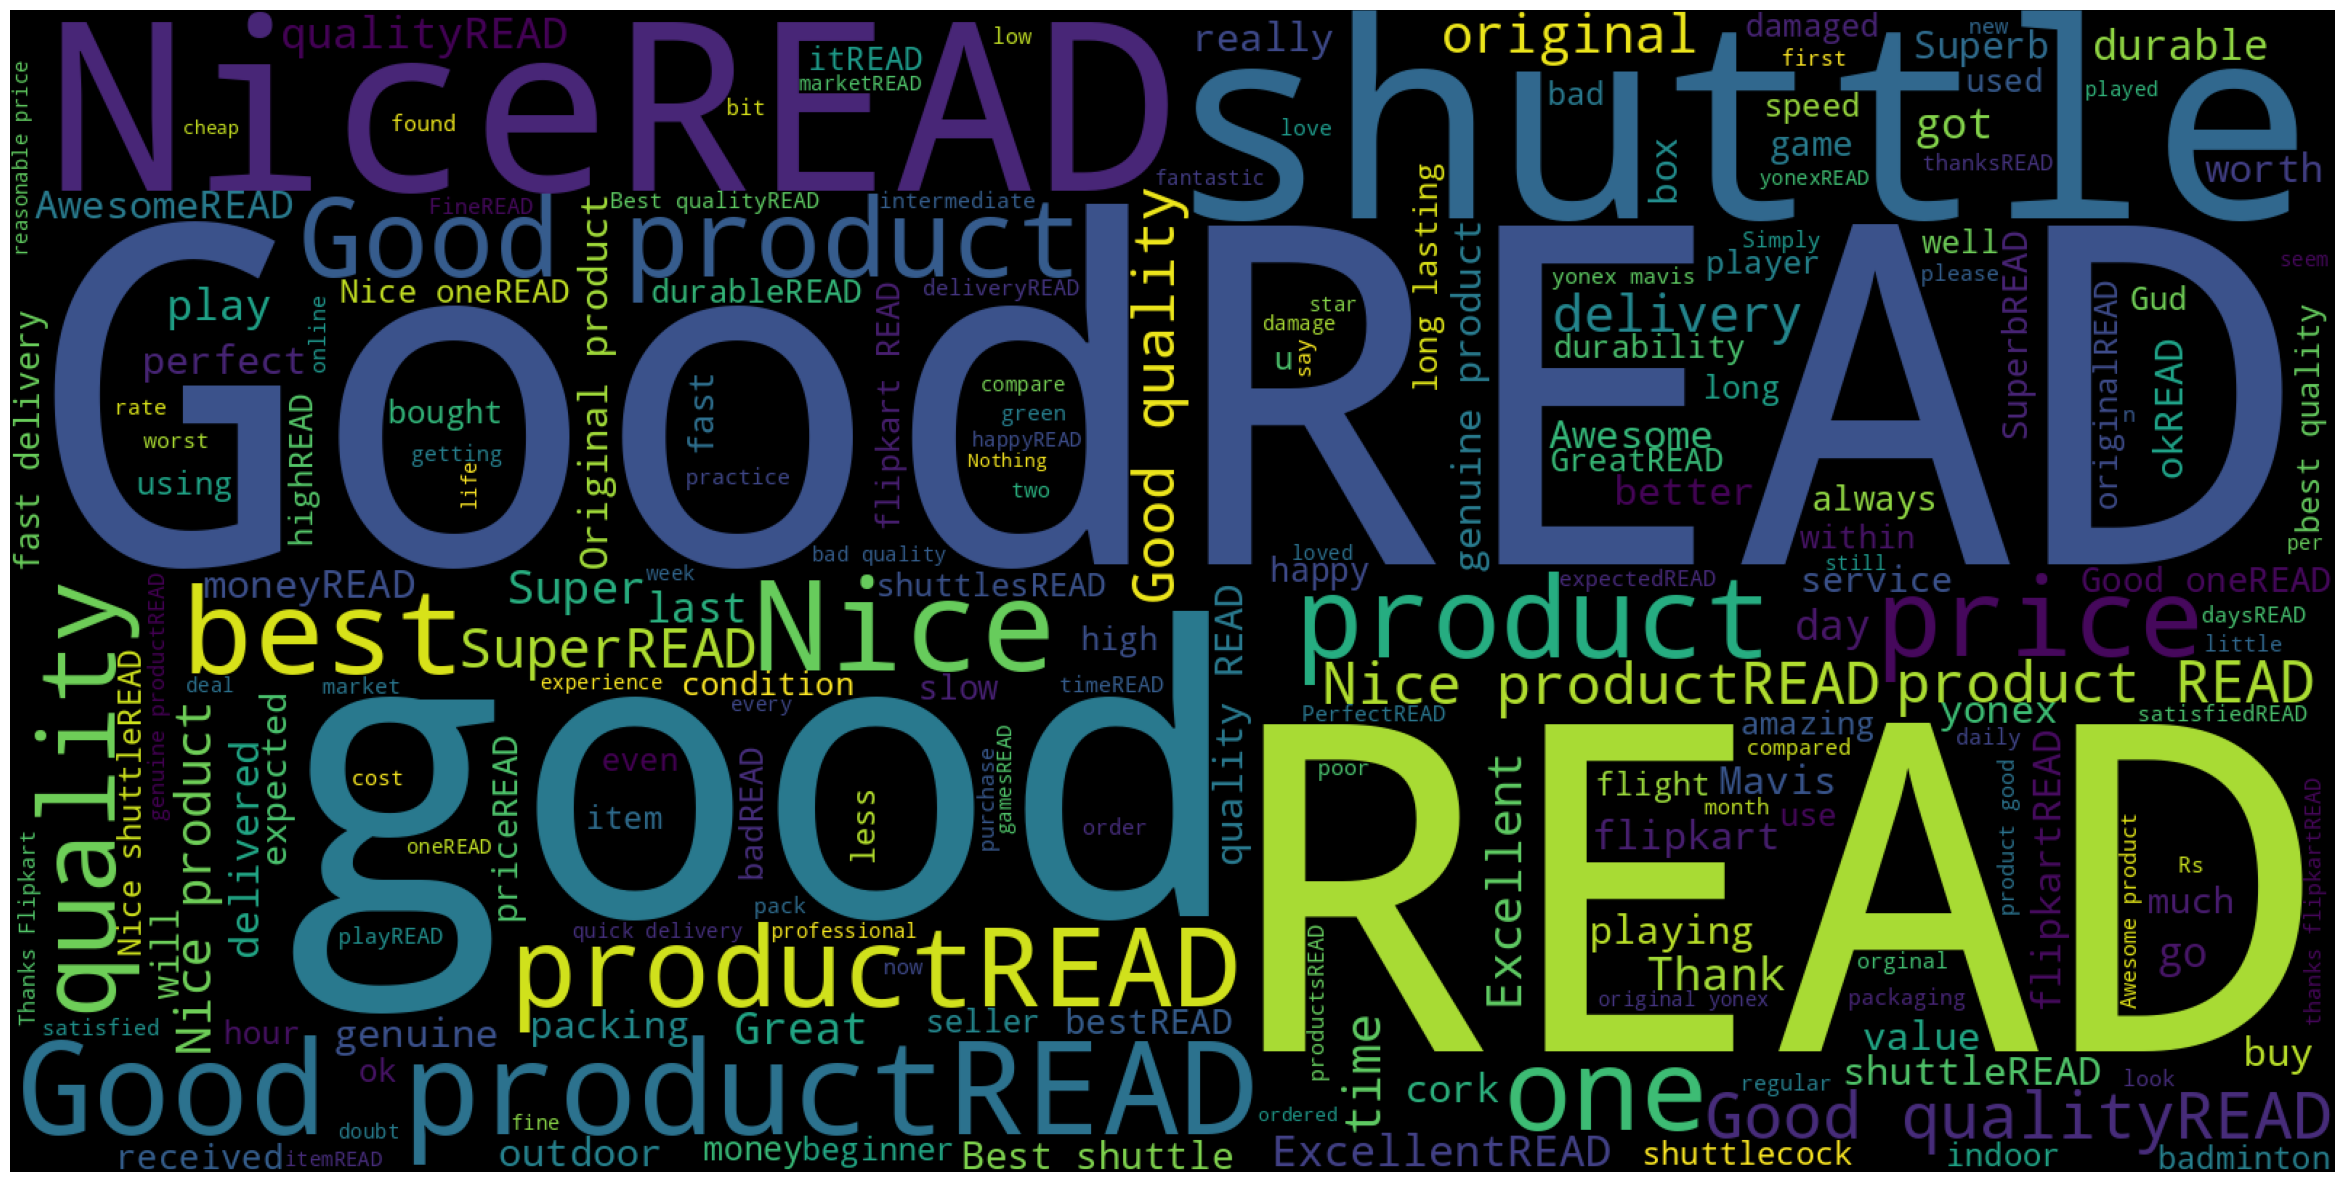

In [129]:
display_wordcloud(X_train[y_train==1])

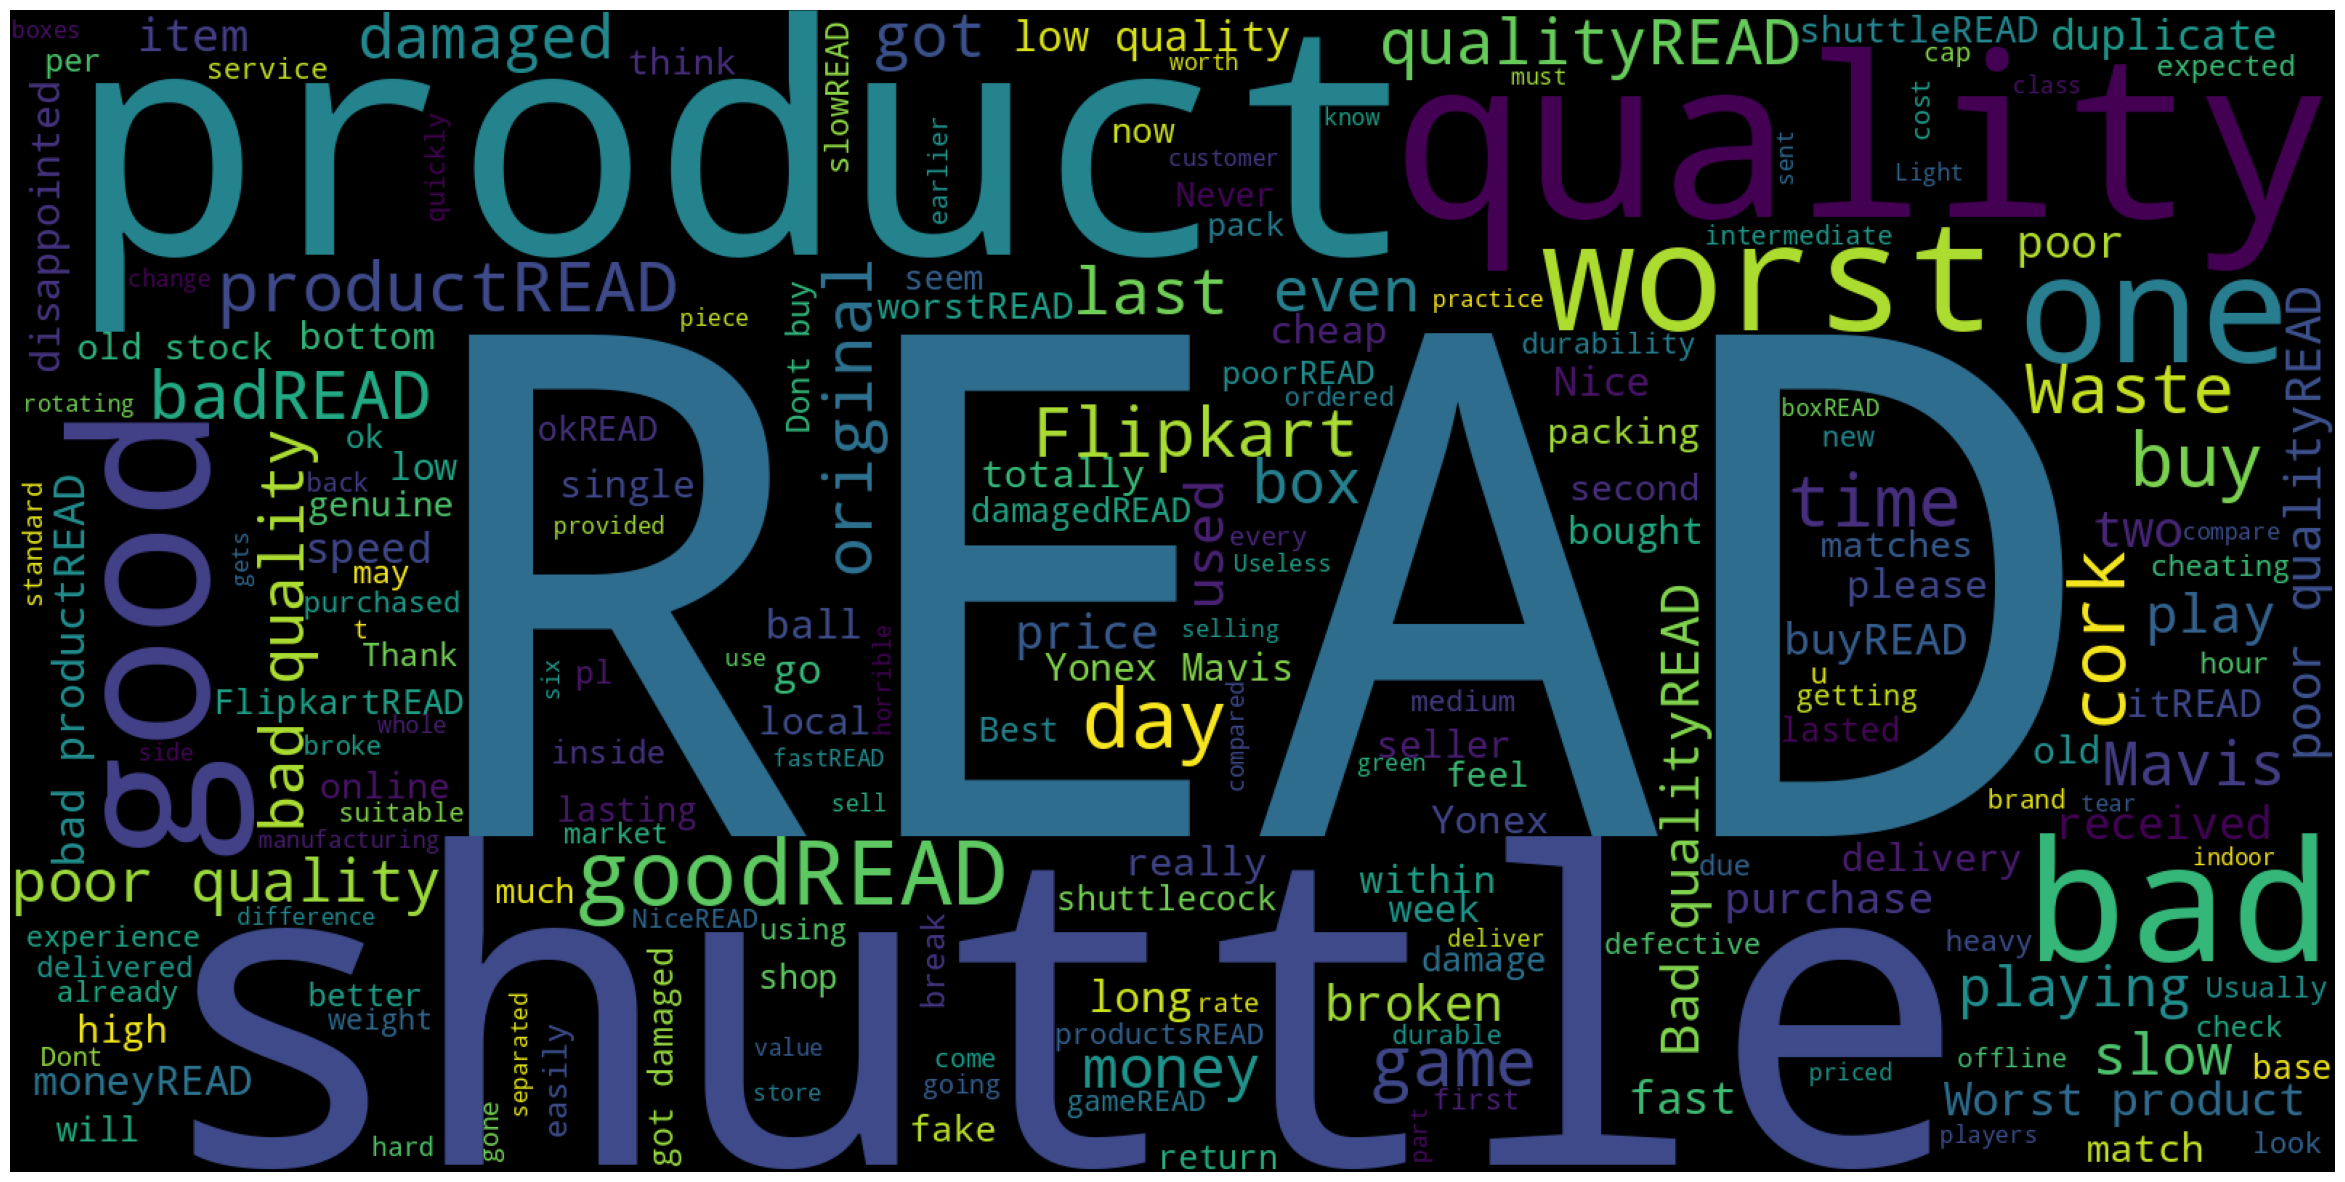

In [130]:
display_wordcloud(X_train[y_train==0])

In [131]:
import re
# Function to remove special characters using regular expressions
def remove_special_characters(text):
    # Define regular expression pattern for special characters
    pattern = r'[^a-zA-Z\s]'  # Keep only alphabets characters and whitespaces

    # Use re.sub() to replace special characters with empty string
    clean_text = re.sub(pattern, '', text)
    clean_text = re.sub('READ','',text)
    return clean_text

In [132]:
# Apply the function to the 'text' column
X_train = X_train.apply(remove_special_characters)

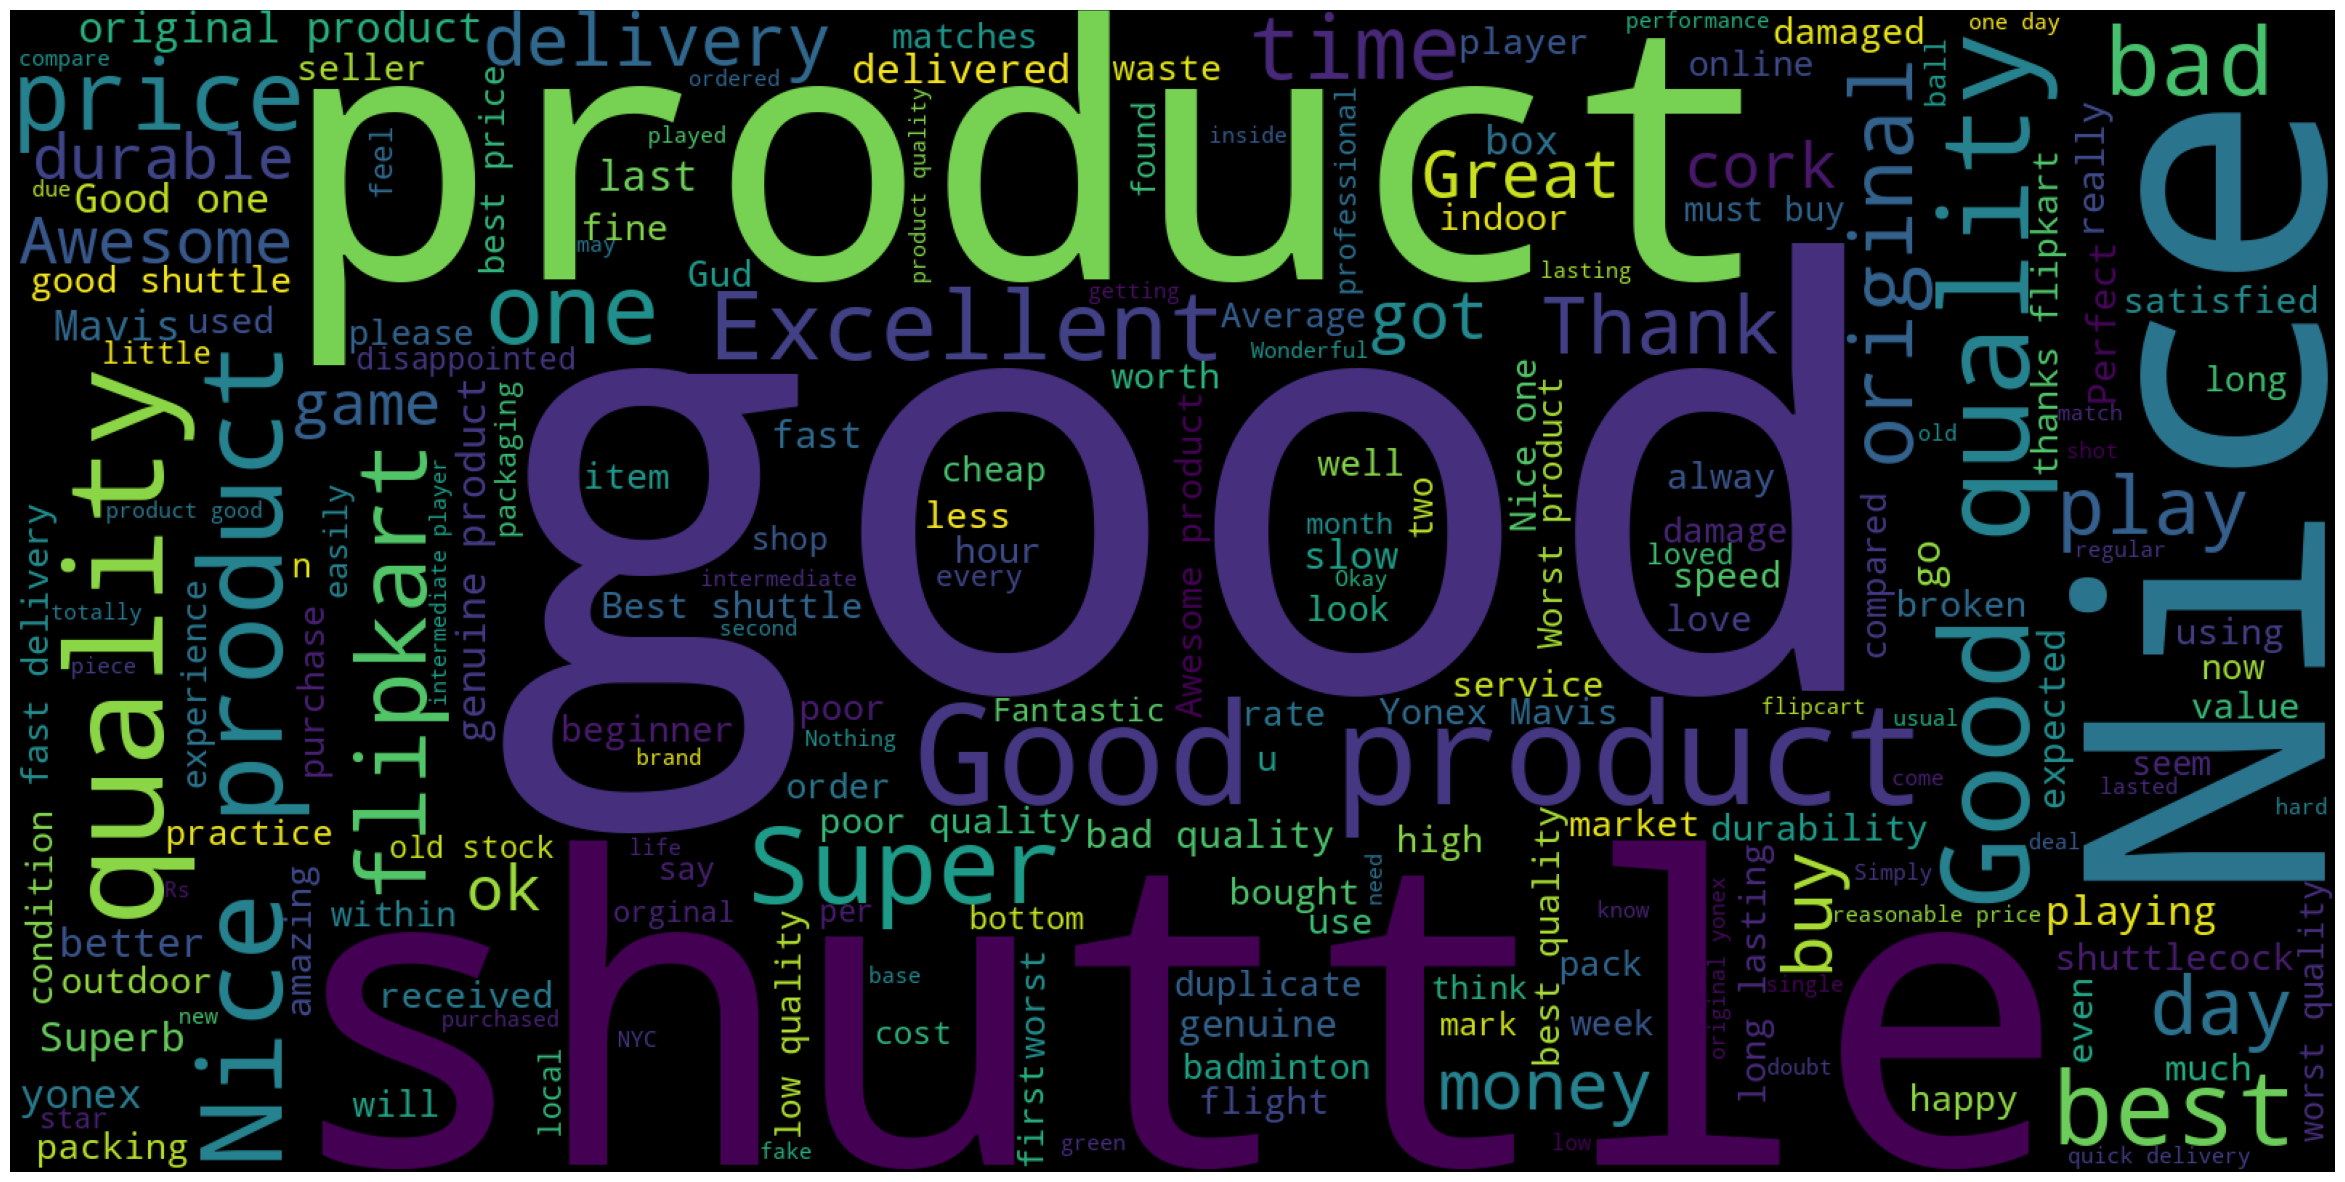

In [133]:
display_wordcloud(X_train)

In [134]:
X_test = X_test.apply(remove_special_characters)

In [135]:
X_train.head()

1372                                      Very good. MORE
3846    Have been purchasing the shuttles from Flipkar...
333                                  Nice product. . MORE
1259    Worst on recent times.We played new Ball today...
3532                                          Better MORE
Name: Review text, dtype: object

In [136]:
!pip install nltk

In [137]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [138]:
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [139]:
def preprocessing_text(doc): # doc is a string of text
    # This text contains a lot of <br/> tags.
    doc = doc.replace("</br>", " ")

    # Remove punctuation and numbers.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Converting to lower case
    doc = doc.lower()

    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]

    # Join and return
    return " ".join(filtered_tokens)

In [140]:
import joblib
from joblib import Memory

import os

In [141]:
# Improving the efficiency by applying cleaning the text data before hand

%time X_train_clean = X_train.apply(lambda doc: preprocessing_text(doc))

CPU times: user 2.44 s, sys: 177 ms, total: 2.62 s
Wall time: 2.7 s


In [142]:
%time X_test_clean = X_test.apply(lambda doc: preprocessing_text(doc))

CPU times: user 817 ms, sys: 56.8 ms, total: 873 ms
Wall time: 1.05 s


In [145]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import joblib
from joblib import Memory

# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory),
    'random_forest': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', RandomForestClassifier())
    ], memory=memory),
    'xgboost': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', XGBClassifier())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features': [1000, 1500, 2000, 5000],
            'classifier__alpha': [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features': [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features': [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ],
    'random_forest': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features': [1000, 1500, 2000, 5000],
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'xgboost': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features': [1000, 1500, 2000, 5000],
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [3, 5, 7],
            'classifier__learning_rate': [0.01, 0.1, 0.3]
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*" * 10, algo, "*" * 10)
    grid_search = GridSearchCV(
        estimator=pipelines[algo],
        param_grid=param_grids[algo],
        cv=5,
        scoring='f1',
        return_train_score=True,
        verbose=1
    )

    %time grid_search.fit(X_train_clean, y_train)
    best_models[algo] = grid_search.best_estimator_

    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))


********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: user 4.17 s, sys: 57.8 ms, total: 4.23 s
Wall time: 4.24 s
Score on Test Data:  0.9490299243669845
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: user 23.8 s, sys: 166 ms, total: 23.9 s
Wall time: 23.4 s
Score on Test Data:  0.9506292352371732
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

CPU times: user 13min 45s, sys: 2.79 s, total: 13min 48s
Wall time: 12min 17s
Score on Test Data:  0.9350473612990526
********** random_forest **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: user 9min 5s, sys: 3.24 s, total: 9min 8s
Wall time: 9min 2s
Score on Test Data:  0.9507983056370154
********** xgboost **********
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
CPU times: user 25min 37s, sys: 7.84 s, total: 25min 45s
Wall time: 15min 12s
Score on Test Data:  0.9525048796356539


In [146]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=1500)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', TfidfVectorizer(max_features=5000)),
                ('classifier', DecisionTreeClassifier(max_depth=5))])

logistic_regression
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.4,
                                    penalty='elasticnet', solver='saga'))])

random_forest
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', TfidfVectorizer(max_features=1500)),
                ('classifier', RandomForestClassifier(n_estimators=200))])

xgboost
Pipeline(memory=Memory(location=.cache/joblib),
         steps

In [149]:


import os
from sklearn import metrics

# Create a directory to save the models
save_dir = '/content/best_models'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

for name, model in best_models.items():
    print("*"*10, name, "*"*10)

    model_path = os.path.join(save_dir, f'{name}.pkl')
    joblib.dump(model, model_path)

    # Load the model
    model = joblib.load(model_path)

    %time y_test_pred = model.predict(X_test_clean)
    print("Test Score (F1)", metrics.f1_score(y_test, y_test_pred))

    print("Model Size:", os.path.getsize(model_path), "Bytes")


********** naive_bayes **********
CPU times: user 17.2 ms, sys: 2 µs, total: 17.2 ms
Wall time: 17.3 ms
Test Score (F1) 0.9490299243669845
Model Size: 112951 Bytes
********** decision_tree **********
CPU times: user 19 ms, sys: 1 µs, total: 19 ms
Wall time: 19 ms
Test Score (F1) 0.9506292352371732
Model Size: 121085 Bytes
********** logistic_regression **********
CPU times: user 18.8 ms, sys: 14 µs, total: 18.8 ms
Wall time: 21 ms
Test Score (F1) 0.9350473612990526
Model Size: 96794 Bytes
********** random_forest **********
CPU times: user 397 ms, sys: 5 ms, total: 402 ms
Wall time: 466 ms
Test Score (F1) 0.9507983056370154
Model Size: 23987967 Bytes
********** xgboost **********
CPU times: user 41.8 ms, sys: 1.85 ms, total: 43.7 ms
Wall time: 37.2 ms
Test Score (F1) 0.9525048796356539
Model Size: 106348 Bytes


In [152]:
# Deserialization

model = joblib.load('best_models/xgboost.pkl')

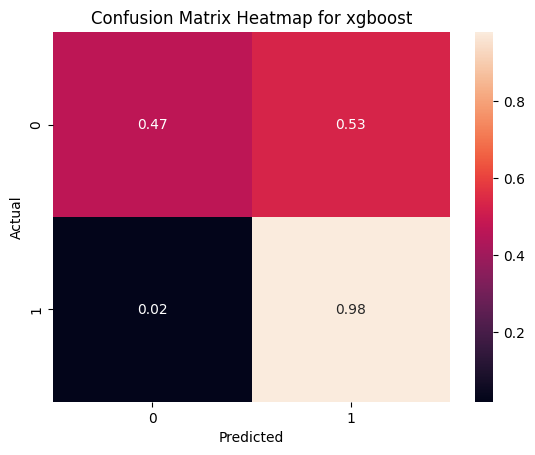

In [153]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the desired model
model_name = 'xgboost'  # Change this to the name of the desired model
model_path = os.path.join(save_dir, f'{model_name}.pkl')
loaded_model = joblib.load(model_path)

# Predict on the training data
y_train_pred = loaded_model.predict(X_train_clean)

# Compute the confusion matrix
cm = metrics.confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

# Plot the heatmap
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=loaded_model.classes_, yticklabels=loaded_model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix Heatmap for {model_name}')
plt.show()


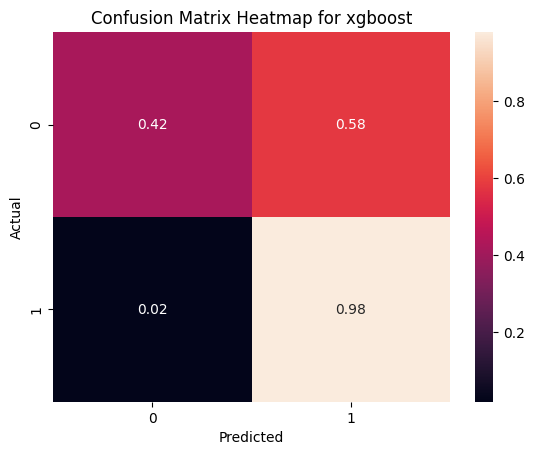

In [154]:
# Compute the confusion matrix
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

# Plot the heatmap
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=loaded_model.classes_, yticklabels=loaded_model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix Heatmap for {model_name}')
plt.show()

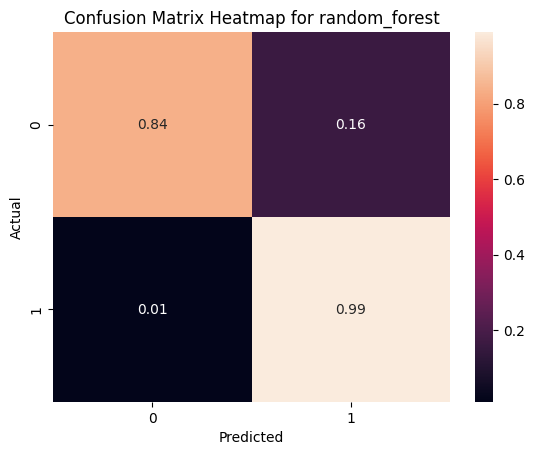

In [155]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the desired model
model_name = 'random_forest'  # Change this to the name of the desired model
model_path = os.path.join(save_dir, f'{model_name}.pkl')
loaded_model = joblib.load(model_path)

# Predict on the training data
y_train_pred = loaded_model.predict(X_train_clean)

# Compute the confusion matrix
cm = metrics.confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

# Plot the heatmap
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=loaded_model.classes_, yticklabels=loaded_model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix Heatmap for {model_name}')
plt.show()

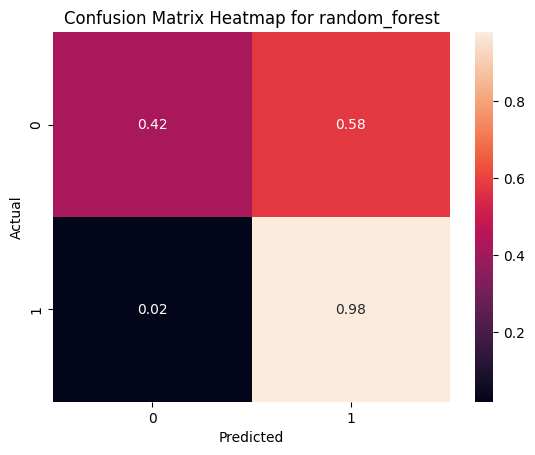

In [156]:
# Compute the confusion matrix
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

# Plot the heatmap
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=loaded_model.classes_, yticklabels=loaded_model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix Heatmap for {model_name}')
plt.show()